In [125]:
import numpy as np  
import matplotlib.pyplot as plt  
import torch 

if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"PyTorch is running on GPU: {torch.cuda.get_device_name(0)}")
else:
    device = torch.device("cpu")
    print("PyTorch is running on CPU.")



PyTorch is running on GPU: Quadro P2000


# Problem 2

### Question A)

In [126]:
def KDE_2D(data, x_range, y_range):
    N = data.shape[0]
    std = np.std(data, axis=0)
    bandwidth = std/(N)**(1/6)
    x_mesh, y_mesh = np.meshgrid(x_range, y_range)
    p = 0
    for i in range(N):
        diff_x = x_mesh - data[i, 0]
        diff_y = y_mesh - data[i, 1]
        p += np.exp(-0.5*(diff_x/bandwidth[0])**2)*np.exp(-0.5*(diff_y/bandwidth[1])**2)
        
    p = p/np.trapz(np.trapz(p, x_range, axis=0), y_range,axis=0)
    return p  



In [127]:
def KDE_2D_GPU(data, x_range, y_range):
    data = torch.tensor(data).to(device)
    x_range = torch.tensor(x_range).to(device)
    y_range = torch.tensor(y_range).to(device)
    N = data.shape[0]
    std = torch.std(data, dim=0)
    bandwidth = std/(N)**(1/6)
    x_mesh, y_mesh = torch.meshgrid(x_range, y_range)
    x_mesh = x_mesh.T
    y_mesh = y_mesh.T
    p = 0
    for i in range(N):
        diff_x = x_mesh - data[i, 0]
        diff_y = y_mesh - data[i, 1]
        p += torch.exp(-0.5*(diff_x/bandwidth[0])**2)*torch.exp(-0.5*(diff_y/bandwidth[1])**2)
    p = p.detach().cpu().numpy() 
    p = p/np.trapz(np.trapz(p, x_range.detach().cpu().numpy(), axis=0), y_range.detach().cpu().numpy(), axis=0)
    return p

In [128]:
def blackbox_simulator(alpha, N):
    return np.random.standard_cauchy(size = N)+alpha**2

In [129]:
N = 30000

alpha_range = np.linspace(-0.5, 2.5, 1001)
d_range = np.linspace(-50, 50, 1001)
data_list = np.zeros(shape=(N, 2))

for i in range(N):
    alpha = np.random.uniform(0., 2., 1)
    d = blackbox_simulator(alpha, 1)
    data = np.array([alpha, d]).reshape(-1, 2)
    data_list[i, :] = data

In [130]:
p = KDE_2D(data_list, alpha_range, d_range)

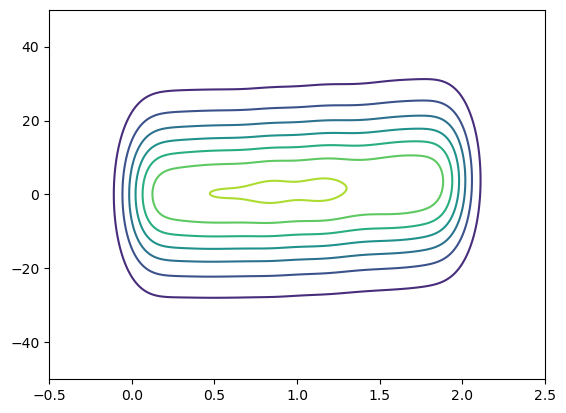

In [131]:
plt.contour(alpha_range, d_range, p)


In [132]:
p_GPU = KDE_2D_GPU(data_list, alpha_range, d_range)

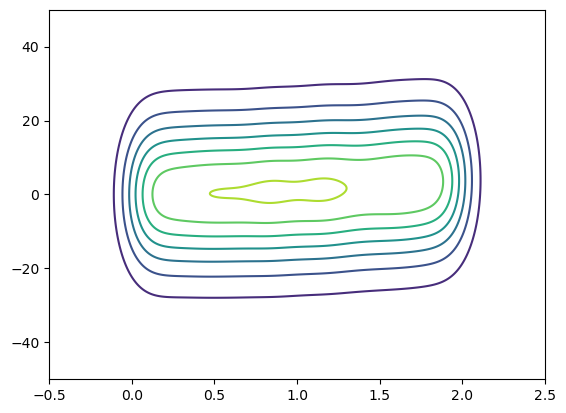

In [133]:
plt.contour(alpha_range, d_range, p_GPU)
# plt.xlabel(r"$\alpha$")
# plt.ylabel("$d$")
# plt.colorbar()

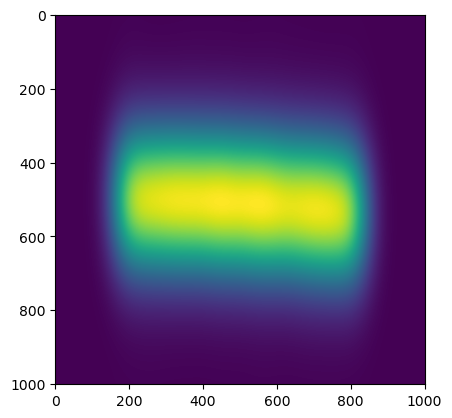

In [134]:
plt.imshow(p)